In [1]:
import os
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from six.moves import urllib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## DOWNLOAD FILE

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("data")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

tgz_path = os.path.join(HOUSING_PATH, "housing.tgz")
urllib.request.urlretrieve(HOUSING_URL, tgz_path)
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=HOUSING_PATH)
housing_tgz.close()
os.remove(tgz_path)

## LOAD FILE

In [3]:
df = pd.read_csv('data/housing.csv')
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## CHART

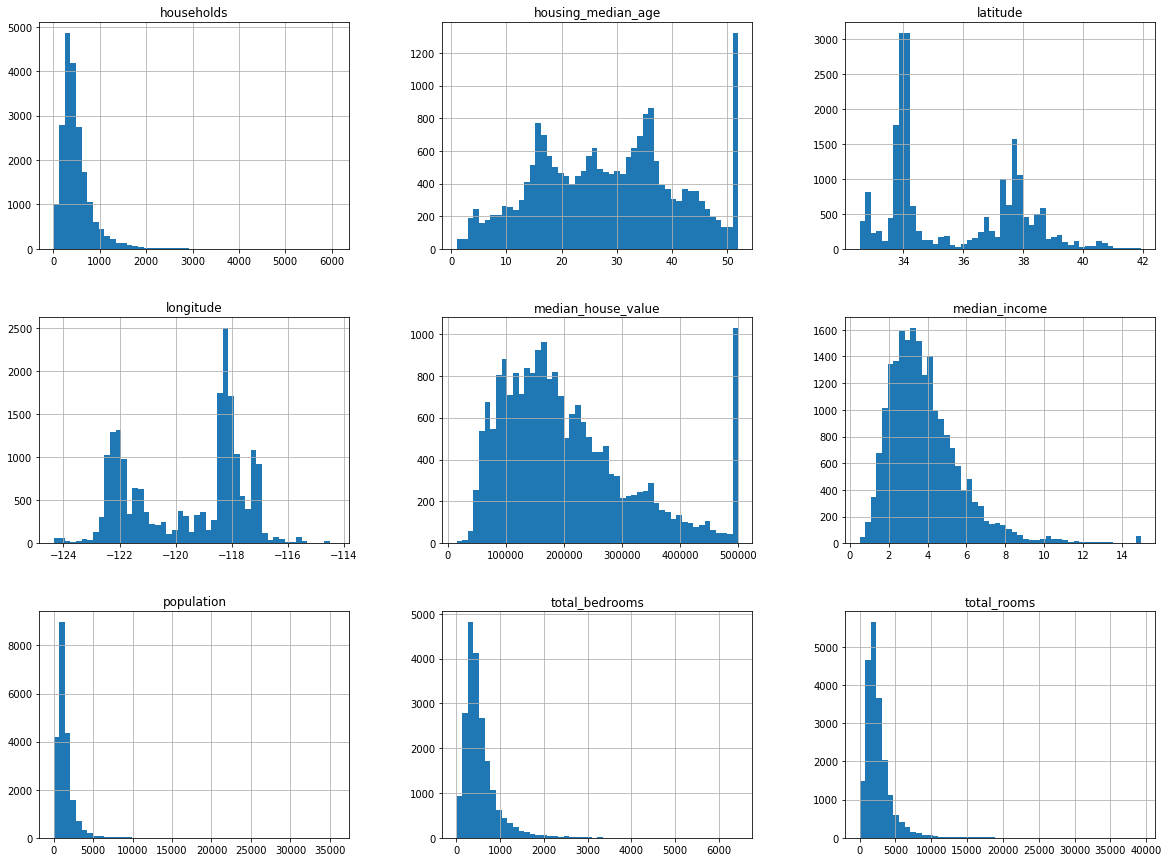

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## TRAIN TEST SPLIT

In [8]:
columns = [c for c in df.columns.values if c != 'median_house_value']
X = df[columns]
y = df[['median_house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=9)

## CATEGORIES

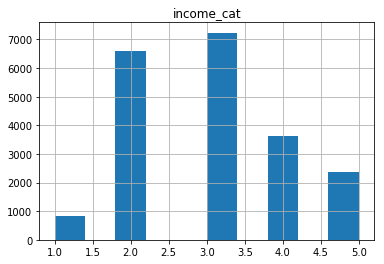

In [9]:
labels=[1, 2, 3, 4, 5]
bins=[0., 1.5, 3.0, 4.5, 6., np.inf]
income_cat = pd.cut(df["median_income"],bins=bins, labels=labels)

income_cat.hist()
plt.title("income_cat")
plt.show()

## SPLITS

In [10]:
X = df.copy()
y = income_cat.copy()
X['income_cat'] = income_cat

splits = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=9)
for train_index, test_index in splits.split(X, y):
    strat_X_train = X.loc[train_index]
    strat_X_test = X.loc[test_index]
    
    strat_y_train = y.loc[train_index]
    strat_y_test = y.loc[test_index]
    
    
strat_X_train['income_cat'].value_counts() / len(strat_X_train)    

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

## All DATA SET IS ALMOS THE SAME

In [11]:
income_cat.value_counts() / len(income_cat)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: median_income, dtype: float64

## THE RANDOM IS NOT THE SAME

In [12]:
labels=[1, 2, 3, 4, 5]
bins=[0., 1.5, 3.0, 4.5, 6., np.inf]
income_cat = pd.cut(X_train["median_income"],bins=bins, labels=labels)

income_cat.value_counts() / len(income_cat)

3    0.349201
2    0.321645
4    0.173752
5    0.115371
1    0.040031
Name: median_income, dtype: float64

## Visualizing Geographical Data

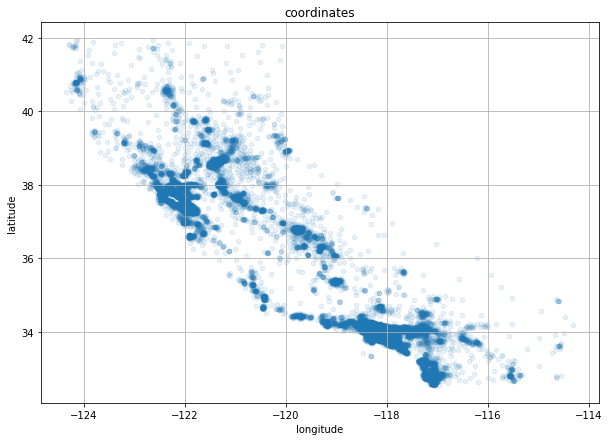

In [13]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.1, figsize=(10, 7))
plt.title("coordinates")
plt.show()

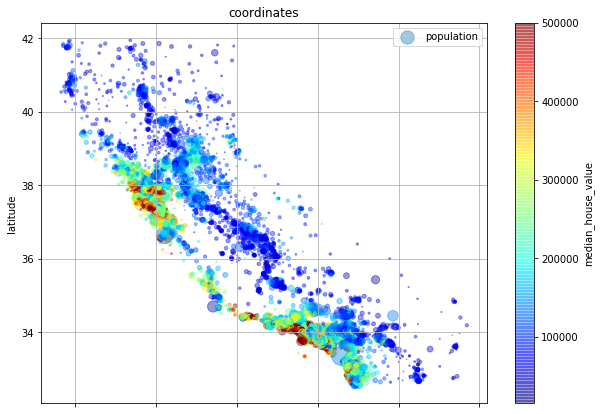

In [14]:
df.plot(
    kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.4, label="population", 
    s=df["population"]/100, c="median_house_value", cmap="jet", colorbar=True, figsize=(10, 7)
)
plt.title("coordinates")
plt.show()

## Looking for Correlations

In [15]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [16]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


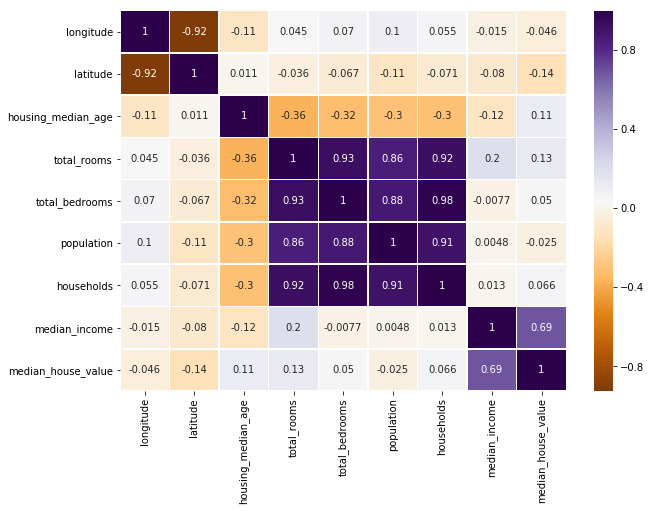

In [17]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, linewidths=0.5, annot=True, cmap="PuOr")
plt.show()

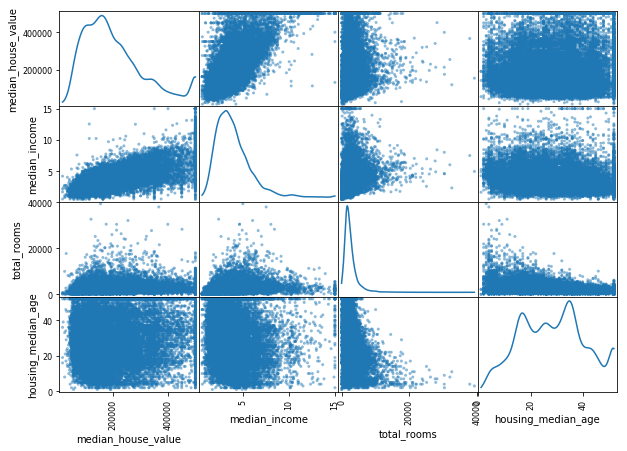

In [18]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(10, 7), diagonal="kde")
plt.show()

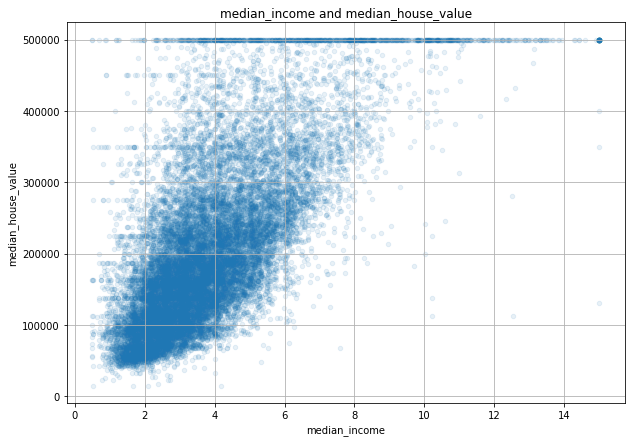

In [19]:
df.plot(kind="scatter", x="median_income", y="median_house_value", grid=True, alpha=0.1, figsize=(10, 7))
plt.title("median_income and median_house_value")
plt.show()

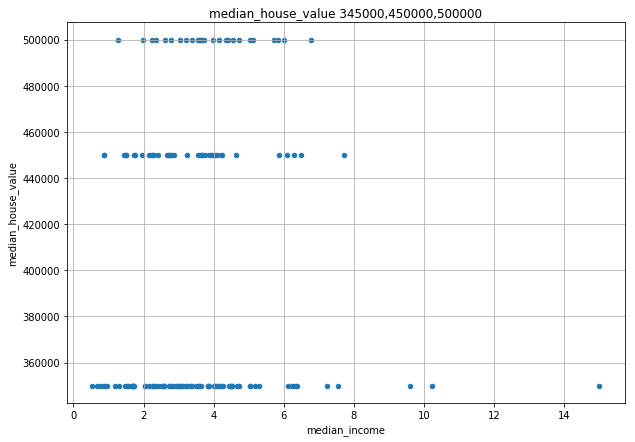

In [20]:
temp_sub = df[
    (df["median_house_value"]==350000) | (df["median_house_value"]==450000) | (df["median_house_value"]==500000)
].copy()
temp_sub.plot(kind="scatter", x="median_income", y="median_house_value", grid=True, alpha=1, figsize=(10, 7))
plt.title("median_house_value 345000,450000,500000")
plt.show()

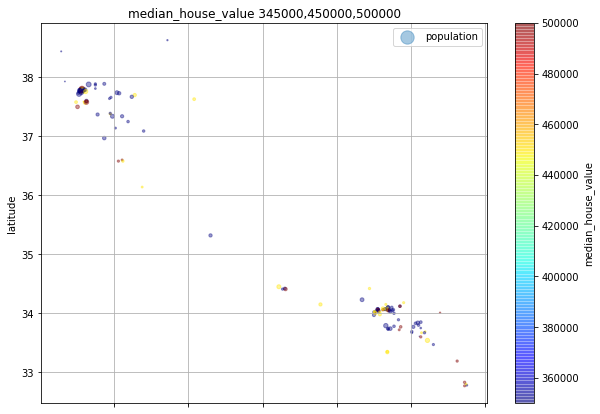

In [21]:
temp_sub.plot(
    kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.4, label="population", 
    s=df["population"]/100, c="median_house_value", cmap="jet", colorbar=True, figsize=(10, 7)
)
plt.title("median_house_value 345000,450000,500000")
plt.show()

## Experimenting with Attribute Combinations

In [22]:
temp_df = df.copy()
temp_df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [23]:
temp_df["rooms_per_household"] = df["total_rooms"]/df["households"]
temp_df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
temp_df["population_per_household"]=df["population"]/df["households"]

temp_df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842


In [24]:
corr_matrix = temp_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

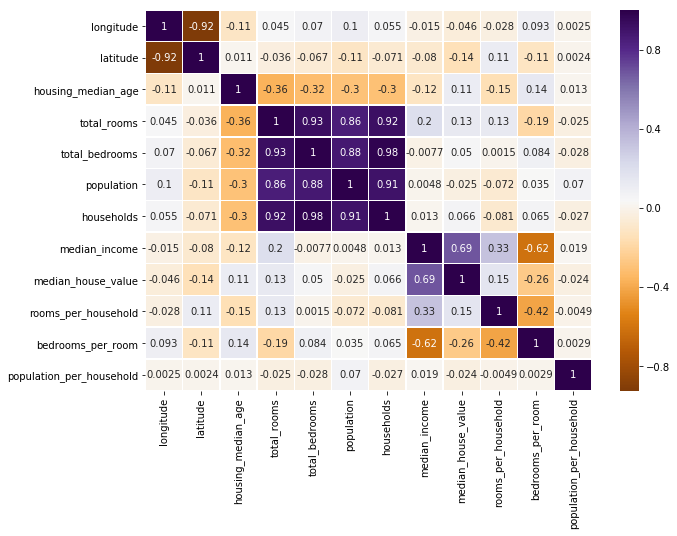

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, linewidths=0.5, annot=True, cmap="PuOr")
plt.show()

The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive.


## DATA CLEANING

In [26]:
df.dropna(subset=["total_bedrooms"]) #case 1

df.drop("total_bedrooms", axis=1) #case 2

median = df["total_bedrooms"].median()
df["total_bedrooms"].copy().fillna(median,inplace=True)  #case 3

In [27]:
# case 1 remove nan
imputer = SimpleImputer(strategy="median")
temp_df = df.drop(columns=["ocean_proximity"]).copy()

imputer.fit(temp_df)

print("Inputer %s" % imputer.statistics_)

temp_imputer = imputer.transform(temp_df)
temp_df = pd.DataFrame(temp_imputer, columns=temp_df.columns)

print("Dataframe %s" % temp_df.median().values)

temp_df[temp_df["total_bedrooms"].isnull()] #No more nan values

Inputer [-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05]
Dataframe [-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [28]:
# case 2 remove ana
imputer = SimpleImputer(strategy="median")
temp_df = df.drop(columns=["ocean_proximity"]).copy()

temp_imputer = imputer.fit_transform(temp_df)

temp_df = pd.DataFrame(temp_imputer, columns=temp_df.columns)

temp_df[temp_df["total_bedrooms"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


## HANDLING TEXT AND CATEGORICAL ATTRIBUTES

In [29]:
ocean_proximity = df[["ocean_proximity"]].copy()
ocean_proximity.head(2)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY


In [30]:
# for this case the order no matters, in other case is necesaty to add some weight

one_hot_encoder = OneHotEncoder()
ocean_proximity_one_hot_encoder = one_hot_encoder.fit_transform(ocean_proximity)

columns = one_hot_encoder.categories_
data = ocean_proximity_one_hot_encoder.toarray()

hot_one = pd.DataFrame(data=data, columns=columns)

hot_one.head(5)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


## CUSTOM TRANSFORMERS

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin


rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)

temp_values = attr_adder.fit_transform(df.values)

temp_values[0,:]  #add extra colums data

array([-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252, 452600.0,
       'NEAR BAY', 6.984126984126984, 2.5555555555555554,
       0.14659090909090908], dtype=object)

In [33]:
t = "CUSTOM TRANSFORMERS"
'-'.join(t.lower().sp)

'c-u-s-t-o-m- -t-r-a-n-s-f-o-r-m-e-r-s'